Анализ проекта Самокат GoFast.

Краткое описание:
у нас есть данные о некоторых пользователях из нескольких городов, а также об их поездках. 
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
Сервисом можно пользоваться:
без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;
с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

Цель:
    Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Описание данных:
В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — users_go.csv
1. user_id	уникальный идентификатор пользователя
2. name	имя пользователя
3. age	возраст
4. city	город
5. subscription_type	тип подписки (free, ultra)
Поездки — rides_go.csv
1. user_id	уникальный идентификатор пользователя
2. distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
3. duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
4. date	дата совершения поездки
Подписки — subscriptions_go.csv
1. subscription_type	тип подписки
2. minute_price	стоимость одной минуты поездки по данной подписке
3. start_ride_price	стоимость начала поездки
4. subscription_fee	стоимость ежемесячного платежа


План
1. Загрузка данных и краткий их просмотр
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. 
4.2 Создаём два дополнительных датафрейма с данными о пользователях с подпиской и без соответственно. 
5. Подсчёт выручки
5.1 Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.
6. Проверка гипотез
6.1 Тратят ли пользователи с подпиской больше времени на поездки?
6.2 Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
6.4 Ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
7. Общий вывод

## Загрузка данных

In [2]:
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')


Вывести первые строки каждого набора данных. Изучить общую информацию о каждом датафрейме.

In [4]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [6]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


## Предобработка данных

Привести столбец date к типу даты pandas.

In [10]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y%m%dT')

In [11]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Создайте новый столбец с номером месяца на основе столбца date.

In [12]:
rides['month'] = rides['date'].dt.month

In [13]:
rides['month'].head(5)

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int64

Проверить наличие пропущенных значений и дубликатов в датафреймах. 

In [14]:
users.duplicated().sum()

31

In [15]:
users = users.drop_duplicates()

In [16]:
users.duplicated().sum()

0

In [17]:
rides.duplicated().sum()

0

In [18]:
subscriptions.duplicated().sum()

0

Пропущенные значения обнаружены не были. Дубликаты были обнаружены только в датасете users и были удалены. 

Неявные дубликаты, судя по имеющимся данным, могут быть в датасете users, колонка name, city, subscription_type. Что бы проверить, выведем уникальные значения

In [19]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [20]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [21]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

Неявные дубликаты обнаружены не были.

Построить boxplot график, что бы лучше представлять значения и аномалии, которые могут быть в некоторых столбцах. Применение метода .describe() так же может быть полезным.

<AxesSubplot:>

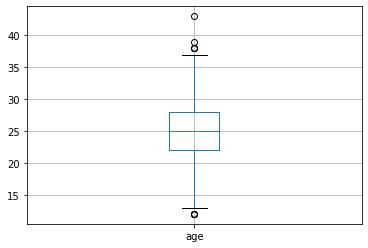

In [22]:
users.boxplot(column='age')

In [23]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<AxesSubplot:>

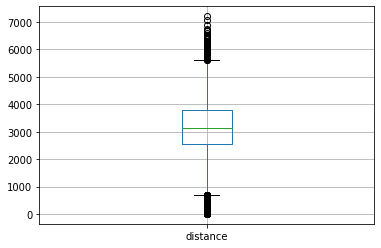

In [24]:
rides.boxplot(column='distance')

In [25]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

<AxesSubplot:>

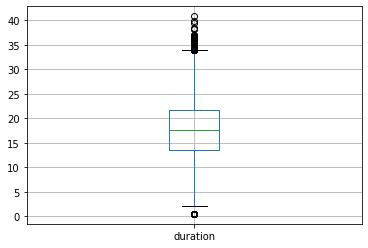

In [26]:
rides.boxplot(column='duration')

In [27]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Возраст пользователей самокатом от 12 до 43 лет. Расстояние за сессию от 0.85 метра до 7211 метра. Время сессии от 0.5 до 40.8 минут. Малое время и расстояние, так же как и большое время использования и значительное расстояние вполне реальны. На данный момент аномалий не найдено. 

In [28]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [29]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [30]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет.

## Исследовательский анализ данных

Частота встречаемости городов:

In [31]:
grouped_city = users.groupby('city')['city'].count()

In [32]:
grouped_city

city
Екатеринбург      204
Краснодар         193
Москва            168
Омск              183
Пятигорск         219
Ростов-на-Дону    198
Сочи              189
Тюмень            180
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

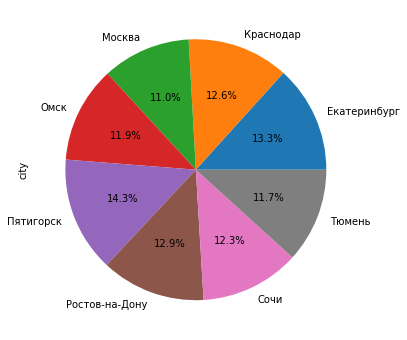

In [33]:
grouped_city.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

Можно наблюдать 8 городов. Количество представителей каждого из них достаточно близки между собой. Меньше всего представлена Москва, больше всего представлен Пятигорск. 

In [70]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


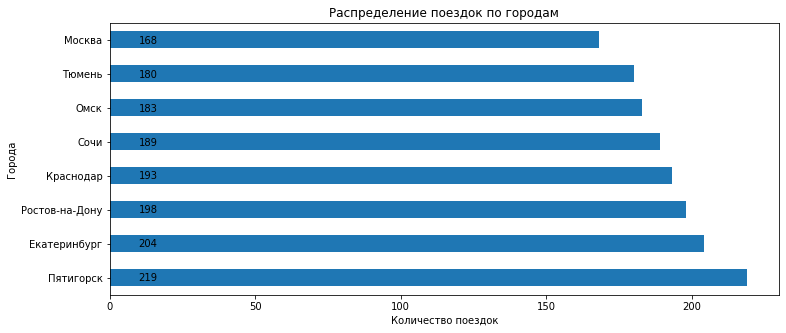

In [34]:
grouped_city = users['city'].value_counts().plot(kind='barh', y = 'group_city', figsize=(12, 5), title='Распределение поездок по городам')
users['city'].value_counts().plot
plt.xlabel('Количество поездок')
plt.ylabel('Города')
plt.text(10, -0.1, '219')
plt.text(10, 0.9, '204')
plt.text(10, 1.9, '198')
plt.text(10, 2.9, '193')
plt.text(10, 3.9, '189')
plt.text(10, 4.9, '183')
plt.text(10, 5.9, '180')
plt.text(10, 6.9, '168')
plt.show()


Описать соотношение пользователей с подпиской и без подписки.

In [35]:
grouped_type = users.groupby('subscription_type')['subscription_type'].count()

<AxesSubplot:ylabel='subscription_type'>

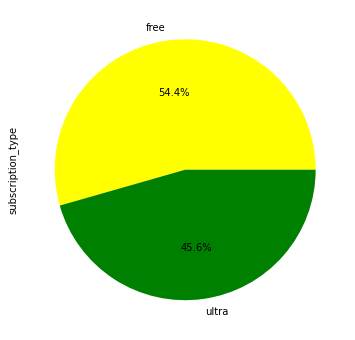

In [36]:
grouped_type.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors = ['yellow','green'])

54.4% пользователей без подписки и 45.6% пользователей имеют подписку. 

Описать возраст пользователей.

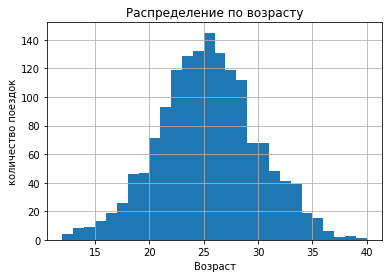

In [37]:
users['age'].plot(kind='hist', bins=28, range= (12, 40), grid=True, title='Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('количество поездок')
plt.show()

Минимальный возраст пользователей - 12 лет. Максимальный - 43. На графике взят диапазон возраста от 12 до 40, тк в этом промежутке основная масса пользователей. Представители от 40 до 43 лет единичны и на картину в целом не влияют. От 12 лет идёт возрастание пользователей практически с каждым годом до пика в 26 лет. Затем идёт снижение со значительным спадом от 29 до 30 лет.

Рассмотреть расстояние, которое пользователь преодолел за одну поездку.

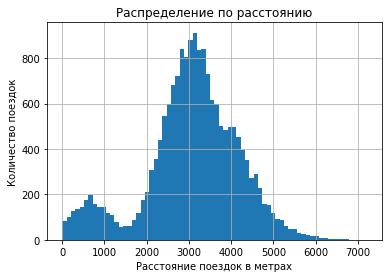

In [38]:
rides['distance'].plot(kind='hist', bins=70, grid=True, title='Распределение по расстоянию')
plt.xlabel('Расстояние поездок в метрах')
plt.ylabel('Количество поездок')
plt.show()

Мы наблюдаем два пика, малый и большой. Расстояние первого пика возможно объяснимо тем, что люди пробуют поехать и у них не получается. И бросают попытки... Второй пик 3100-3200 метров. Большая часть людей в среднем проезжают именно это расстояние. К нему идёт поъем от 1500 метров до пика и спуск до 6000 метров. Людей, которые проезжают свыше 6000 метров уже не много... 

Рассмотреть продолжительность поездок

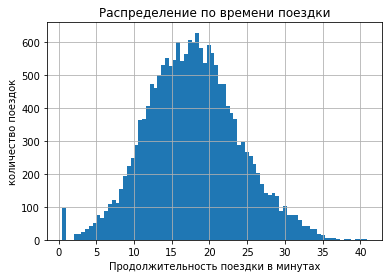

In [39]:
rides['duration'].plot(kind='hist', bins=80, grid=True, title='Распределение по времени поездки')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('количество поездок')
plt.show()


In [40]:
rides[rides['duration'] < 2]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Мы наблюдаем значения от полу минуты до 40.8 минут. Медиана 17 минут и пик можно наблюдать в районе 17-18 минут. Именно такое время продолжительности езды на самокате является самым популярным. После этого пика идёт плавное снижение продолжительности аренды и случаев от 35 до 40 минут уже очень мало.
Так же были выявленны 95 случаев, когда поездка продолжалась 0.5 минуты. Такие значения похожы на выброс, но не зная причины не стал бы удалять, а обратился бы к заказчику исследования/рук-ву проекта, с целью понять, что это. Возможно, технический сбой или особенность работы приложения/бронирования транспортного средства или его отмены...  Такие поездки наблюдаются в разные дни и в разные месяцы, то есть нет локализации в один день, что могло бы указывать на сбой в работе сервиса.

## Объединение данных

Объединить данные о пользователях, поездках и подписках в один датафрейм. Для этого использовать методом merge().

In [41]:
users_rides=users.merge(rides, on='user_id')

In [42]:
users_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [43]:
users_rides_subscriptions = users_rides.merge(subscriptions, on='subscription_type')

In [44]:
users_rides_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Создать датафрейм c данными о пользователях без подписки

In [45]:
u_r_s_free = users_rides_subscriptions[users_rides_subscriptions['subscription_type'] == 'free']

In [46]:
u_r_s_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Создать датафрейм c данными о пользователях с подпиской

In [47]:
u_r_s_ultra = users_rides_subscriptions[users_rides_subscriptions['subscription_type'] == 'ultra']

In [48]:
u_r_s_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199



Проверим, совпадает ли размерность датафрейма u_r_s_free и u_r_s_ultra с датафреймом users_rides_subscriptions


In [49]:
users_rides_subscriptions.shape

(18068, 12)

In [50]:
u_r_s_free.shape

(11568, 12)

In [51]:
u_r_s_ultra.shape

(6500, 12)

6500+11568=18068. Ни одна строчка не была потеряна.

Построим два графика дистанции, которые проезжают пользователи тарифа free и  ultra

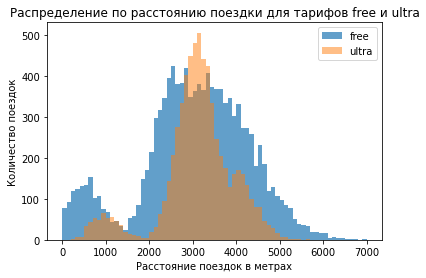

In [52]:
ax = u_r_s_free['distance'].plot(kind='hist', bins=70, label='free', alpha=0.7, range= (0, 7000), legend=True)
u_r_s_ultra['distance'].plot(kind='hist', bins=70, label='ultra', alpha=0.5, range= (0, 7000), ax=ax,legend=True, title='Распределение по расстоянию поездки для тарифов free и ultra')
plt.xlabel('Расстояние поездок в метрах')
plt.ylabel('Количество поездок')
plt.show()


На графике видно, что на тарифе с платной подпиской есть ярко выраженный пик. Это можно связать с тем, что те, кто пользуются данным тарифом не катаются в своё удовольствие, а доезжают от конкретной точки А, до точки B. К примеру, от дома до работы, от работы до станции метро и т.д. И это расстояние пользователи считают оптимальным, что бы часто преодолевать на самокате. А на тарифе без подписки, пользователи чаще катаются для развлечения, по этому нет такого реского поъема и спада их числа, в зависимости от расстояния, которое было преодолено. 

Построим два графика времени, которые пользователи тарифа free и  ultra проводят в пути

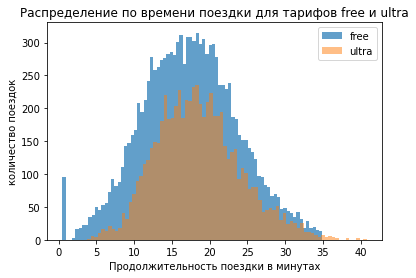

In [53]:
u_r_s_free['duration'].plot(kind='hist', bins=80, label='free', alpha=0.7, legend=True)
u_r_s_ultra['duration'].plot(kind='hist', bins=80, label='ultra', alpha=0.5, legend=True, title='Распределение по времени поездки для тарифов free и ultra')
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('количество поездок')
plt.show()


Форма графиков построенных по времени поездки очень похожа. Различия состоят в том, что люди на тарифе с абонентской платой едут от 4.30-5 минут и до 35-40 минут, а без абонентской - часть людей проводит на самокате лишь 2-3 минуты. И чаще такие поездки заканчиваются до 35 минут. 

## Подсчёт выручки

Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [54]:
new_u_r_s = users_rides_subscriptions.groupby(['user_id', 'month','name','subscription_type']).agg({
'date': 'count',
'distance': 'sum',
'duration': 'sum'
}).reset_index()

In [55]:
new_u_r_s.head(10)


,user_id,month,name,subscription_type,date,distance,duration
0,1,1,Кира,ultra,2,7027.511294,41.416640
1,1,4,Кира,ultra,1,754.159807,6.232113
2,1,8,Кира,ultra,2,6723.470560,44.776802
3,1,10,Кира,ultra,2,5809.911100,31.578017
4,1,11,Кира,ultra,3,7003.499363,53.397424
5,1,12,Кира,ultra,2,6751.629942,27.203912
6,2,3,Станислав,ultra,3,10187.723006,60.959959
7,2,4,Станислав,ultra,2,6164.381824,39.048633
8,2,6,Станислав,ultra,1,3255.338202,13.851127
9,2,7,Станислав,ultra,2,6780.722964,46.170157


Для следующего задания нужны округлённые в большую сторону значения столбца 'duration' (время поездок).

In [56]:
users_rides_subscriptions['duration'] = users_rides_subscriptions['duration'].apply(lambda x: ceil(x))

Усовершенствуем датасет используя округлённые значения. 

In [57]:
new_u_r_s = users_rides_subscriptions.groupby(['user_id', 'month','minute_price','subscription_fee','start_ride_price']).agg({
'date': 'count',
'distance': 'sum',
'duration': 'sum'
}).reset_index()

In [58]:
new_u_r_s.head()


,user_id,month,minute_price,subscription_fee,start_ride_price,date,distance,duration
0,1,1,6,199,0,2,7027.511294,42
1,1,4,6,199,0,1,754.159807,7
2,1,8,6,199,0,2,6723.470560,46
3,1,10,6,199,0,2,5809.911100,32
4,1,11,6,199,0,3,7003.499363,56


Убедимся, что количество строчек не поменялось. Такой метод подходит, только если у нас в течение наблюдаемого периода, пользователи не меняли тариф. Так как переходов не было, данный способ подходит.

In [59]:
new_u_r_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           11331 non-null  int64  
 1   month             11331 non-null  int64  
 2   minute_price      11331 non-null  int64  
 3   subscription_fee  11331 non-null  int64  
 4   start_ride_price  11331 non-null  int64  
 5   date              11331 non-null  int64  
 6   distance          11331 non-null  float64
 7   duration          11331 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 708.3 KB


Добавить столбец с помесячной выручкой (cost_rides), которую принёс каждый пользователь

In [60]:
new_u_r_s['cost_rides'] = (new_u_r_s['start_ride_price'] * new_u_r_s['date']) + (new_u_r_s['minute_price']*new_u_r_s['duration']) + new_u_r_s['subscription_fee']

In [61]:
new_u_r_s.head()

,user_id,month,minute_price,subscription_fee,start_ride_price,date,distance,duration,cost_rides
0,1,1,6,199,0,2,7027.511294,42,451
1,1,4,6,199,0,1,754.159807,7,241
2,1,8,6,199,0,2,6723.470560,46,475
3,1,10,6,199,0,2,5809.911100,32,391
4,1,11,6,199,0,3,7003.499363,56,535


In [62]:
# Код ревьюера
new_u_r_s.groupby('subscription_fee')['cost_rides'].mean()

subscription_fee
0      328.641365
199    362.792191
Name: cost_rides, dtype: float64

## Проверка гипотез

6.1 
Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Нулевая гипотеза: средняя выборка из генеральной совокупности датасета тех, кто ездит по платной подписке равна средней выборке из генеральной совокупностити, кто ездит без платной подписки. 
Альтернативная гипотеза: средняя выборка из генеральной совокупности датасета людей с подписко больше средней выборке из генеральной совокупности датасета людей без подписки. 

Тут мы берем датасеты целиком и сравниваем средние генеральных совокупностей из сформированных датасетов. Для этого, возьмём их из не обработанных данных столбцов duration, датасетов u_r_s_free и u_r_s_ultra.

In [63]:


duration_1 = u_r_s_ultra['duration']
duration_2 = u_r_s_free['duration']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind( duration_1, duration_2, alternative = 'greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


За альтернативную была взята гипотеза, что средняя генеральной совокупности датасета людей с подпиской больше средней генеральной совокупности датасета людей без подписки. Из этого можно сделать вывод, что пользователи с подпиской могут быть «выгоднее» для компании, т.к. зачастую тратят больше времени на поездки.  

6.2
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверить гипотезу и сделать выводы.

Нулевая гипотеза: фактическое среднее расстояние одной поездки самоката равно 3130 метров. 
Альтернативная гипотеза: фактическое среднее расстояние одной поездки больше 3130

In [64]:
average_distance = u_r_s_ultra['distance']
expected_distance = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    average_distance, 
    expected_distance,
      alternative='greater')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Можно говорить о том, что мы не отвергаем нулевую гипотезу и фактическое среднее расстояние одной поездки самоката может быть равно 3130 метров(p-значение почти 92%, и это говорит о том, что с данной вероятностью мы получим фактическое среднее расстояние поездки равное 3130 метров).


Для бизнеса можно сделать вывод, что исходя из имеющихся данных, расстояние которое проезжают пользоватили примерно равно оптимальному с точки зрения износа самоката.

6.3
Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод

Нулевая гипотеза: средняя помесячная выручка от пользователей с подпиской по месяцам равна средней помесячная выручка от пользователей без подписки. 
Альтернативная гипотеза: средняя помесячная выручка от пользователей с подпиской по месяцам больше, чем от пользователей без подписки.

Для того, что бы выполнить сравнение, сделаем два датасета из new_u_r_s, где в одном будут только помесячная выручка с подпиской, в другом без. Для этого нам понадобится столбец subscription_fee, в котором значение 199 означает, что это с подпиской и значение 0 - без подписки. 

In [65]:
new_u_r_s_ultra = new_u_r_s[new_u_r_s['subscription_fee'] == 199]

In [66]:
new_u_r_s_free = new_u_r_s[new_u_r_s['subscription_fee'] == 0]

In [67]:
new_u_r_s_ultra.head()

,user_id,month,minute_price,subscription_fee,start_ride_price,date,distance,duration,cost_rides
0,1,1,6,199,0,2,7027.511294,42,451
1,1,4,6,199,0,1,754.159807,7,241
2,1,8,6,199,0,2,6723.470560,46,475
3,1,10,6,199,0,2,5809.911100,32,391
4,1,11,6,199,0,3,7003.499363,56,535


In [68]:
new_u_r_s_free.head()

,user_id,month,minute_price,subscription_fee,start_ride_price,date,distance,duration,cost_rides
4533,700,1,8,0,50,1,2515.690719,15,170
4534,700,2,8,0,50,5,13446.659764,89,962
4535,700,3,8,0,50,1,3798.334905,19,202
4536,700,4,8,0,50,1,2984.551206,16,178
4537,700,6,8,0,50,2,5927.650988,29,332


In [69]:
cost_rides_ultra = new_u_r_s_ultra['cost_rides']
cost_rides_free = new_u_r_s_free['cost_rides']

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind( cost_rides_ultra, cost_rides_free, alternative = 'greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


Вероятность того, что мы получим фактическое среднее значение выручки от пользователей с подпиской по месяцам равное выручке от пользователей без подписки очень мала. По этому можно сказать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Сформулируем гипотезы.
Нулевая гипотеза: количество обращений до обновления совпадает с количеством обращений после обновления. 
Альтернативная гипотеза: количество обращений до обновления больше, чем количество обращений после обновления.

Мы можем использовать функцию scipy.stats.ttest_rel() с обязательными аргументами sample_1, sample_2: где за sample_1 и sample_2 мы принимаем за датасет с количеством обращений до обновления и после соответственно. А так же используем аргумент alternative = 'greater', т.к. альтернативная гипотеза- правосторонняя.

Для интерпретации результатов теста, необходимо сравнить p_value с заданным уровнем значимости (например, 0.05). Если p_value меньше заданного уровня значимости, то можно отклонить нулевую гипотезу и считать, что есть статистически значимые различия между средними значениями связанных датасетов. 
При условии, что нулевая гипотеза верна, вероятность получить наблюдаемые данные о том, что количество обращений до и после обновления ровны высока.
Если нулевая гипотеза отклонена, то будет верна альтернативная гипотеза. Вероятность получить большее значие средней совокупности датасета с количеством обращений до обновления высока. Следовательно, количество обращений в техподдержку снизилось.

## Общий вывод

В предобработке данных 
1. столбец date был приведен к типу даты pandas.
2. Был создан новый столбец с номером месяца на основе столбца date.
3. Проверка на наличие явных дубликатов показала их наличие в столбце users в количестве 31 штука. Были удалены. Не явные дубликаты выявленны не были. 
4. Неявные дубликаты могли бы быть найдены в датасете users, колонка name, city, subscription_type. Были просмотрены, неявные дубликаты обнаружены не были. 
Во время исследовательского анализа
1) была рассмотрена частота встречаемости городов;
2) соотношение пользователей с подпиской и без подписки;
3) возраст пользователей;
4) расстояние, которое пользователь преодолел за одну поездку;
5) продолжительность поездок.
Были созданы два датафрейма из объединенных дынных 3 таблиц, по признаку пользователей с платной подпиской и без. 
Был создан датафрейм с агригированными данными для каждого пользователя с суммарным расстоянием, количеством поездок и суммарным времянем для каждого пользователя за каждый месяц.
В этот же датафрейм был добавлен столбец с помесячной выручкой, которую принёс каждый пользователь.
В результате проверки некоторых гипотез были сделаны следующие выводы:
1) пользователи с подпиской могут быть «выгоднее» для компании, т.к. зачастую тратят больше времени на поездки.
2) фактическое среднее расстояние одной поездки самоката может быть равно 3130 метров(p-значение почти 92%, и это говорит о том, что с данной вероятностью мы получим фактическое среднее расстояние поездки равное 3130 метров).
3) вероятность того, что мы получим фактическое среднее значение выручки от пользователей с подпиской по месяцам равное выручке от пользователей без подписки очень мала. По этому можно сказать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
4) если p_value меньше заданного уровня значимости, то можно отклонить нулевую гипотезу и считать, что есть статистически значимые различия между средними значениями связанных датасетов. При условии, что нулевая гипотеза верна, вероятность получить наблюдаемые данные о том, что количество обращений до и после обновления ровны высока. Если нулевая гипотеза отклонена, то будет верна альтернативная гипотеза. Вероятность получить большее значие средней совокупности датасета с количеством обращений до обновления высока. Следовательно, количество обращений в техподдержку снизилось.


Рекомендации для бизнеса: 

Исходя из проделанного анализа, можно сделать вывод, что пользователи с подпиской более выгодны, чем без, тк средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. При этом, среднее расстояние, которое проезжает пользователь с подпиской, укладывается в оптимальное с точки зрения износа самоката.